## Problem Statement:
The goal of this project is to develop a text classification model using a Gated Recurrent Unit (GRU) neural network to automatically categorize text documents into one of 20 predefined categories. The task is to leverage the 20 Newsgroups dataset, which consists of text data from various topics, to train a model that can accurately classify new, unseen text documents into their appropriate categories. This type of text classification is crucial in applications like document organization, spam filtering, topic modeling, and content recommendation systems.

## Data Description:
The dataset used in this project is the 20 Newsgroups dataset, which is widely used for text classification and NLP tasks. It includes a collection of approximately 20,000 newsgroup documents, evenly distributed across 20 different categories. The dataset is already labeled, making it suitable for supervised learning.

## Key Characteristics of the Data:
Total Documents: ~20,000
Number of Categories: 20
Examples of categories include sci.space, comp.graphics, rec.sport.hockey, talk.politics.mideast, and alt.atheism.
## Data Attributes:
- Text: The main content of each document (used as input for the model).
- Labels: Integer values (0-19) representing the category to which each document belongs.
## Text Preprocessing:
The text data includes headers, footers, and quotes, which are removed to focus on the main content.
Tokenization, padding, and sequence conversion are performed before feeding the data into the GRU model.
## Use Case:
Automating the process of text classification can help businesses and organizations efficiently categorize large volumes of text data. This can be applied to organizing customer support tickets, categorizing news articles, filtering spam emails, or even aiding legal document management. The GRU model's ability to capture sequential patterns in text makes it a robust choice for this task.

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Step 1: Load the Dataset

In [8]:
# Fetching the 20 Newsgroups dataset using sklearn
print("Loading the 20 Newsgroups dataset...")
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, remove=('headers', 'footers', 'quotes'))

# Extracting the text data and their corresponding labels
texts, labels = newsgroups_data.data, newsgroups_data.target
categories = newsgroups_data.target_names

# Printing basic information about the dataset
print(f"Number of classes: {len(categories)}")
print(f"Sample categories: {categories[:5]}")

Loading the 20 Newsgroups dataset...
Number of classes: 20
Sample categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']


### Explanation:

We load the 20 Newsgroups dataset, which contains text documents categorized into 20 topics.
The fetch_20newsgroups() function retrieves the data, and we extract both the text (data) and their associated labels (target).

In [9]:
# Step 2: Data Preprocessing
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

In [10]:
X_train[0]

"No doubt this is an old question, but I didn't find the answer in the\nFAQs I could find, so - here goes:\n\nI have a Sunview application that I want to convert to X (OpenLook,\nMotiv, whatever). I remember hearing quite some time ago that there\nare tools to accomplish this task.\n\n\ta) is that so?\n\tb) are they public domain?\n\tc) any good, i.e.\n\td) advantages over reimplementing the interface myself?\n\nThanks,"

In [11]:
# Define maximum number of words to consider and sequence length
max_words = 10000  # We'll consider only the top 10,000 words in the dataset
max_len = 200      # We'll truncate or pad each document to a length of 200 tokens

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words, lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [12]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 "'ax": 5,
 'a': 6,
 'and': 7,
 'i': 8,
 'in': 9,
 'is': 10,
 'that': 11,
 'it': 12,
 'for': 13,
 'you': 14,
 'on': 15,
 'this': 16,
 'be': 17,
 'have': 18,
 'are': 19,
 'with': 20,
 'not': 21,
 'as': 22,
 '1': 23,
 'or': 24,
 'if': 25,
 'was': 26,
 'but': 27,
 '2': 28,
 '0': 29,
 'they': 30,
 'from': 31,
 'by': 32,
 '3': 33,
 'at': 34,
 'an': 35,
 'can': 36,
 'm': 37,
 'all': 38,
 'will': 39,
 "'": 40,
 'my': 41,
 'what': 42,
 'there': 43,
 'one': 44,
 'would': 45,
 'x': 46,
 'about': 47,
 'do': 48,
 'we': 49,
 'he': 50,
 'so': 51,
 'has': 52,
 'your': 53,
 'no': 54,
 '4': 55,
 'any': 56,
 'some': 57,
 'which': 58,
 'q': 59,
 '5': 60,
 'me': 61,
 'who': 62,
 'out': 63,
 'more': 64,
 '7': 65,
 'were': 66,
 'their': 67,
 'when': 68,
 'like': 69,
 "don't": 70,
 'people': 71,
 'other': 72,
 'w': 73,
 'up': 74,
 'just': 75,
 'p': 76,
 '8': 77,
 '6': 78,
 'max': 79,
 'had': 80,
 'know': 81,
 'get': 82,
 'them': 83,
 's': 84,
 'also': 85,
 'only': 

In [13]:
# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [14]:
X_train[0]

"No doubt this is an old question, but I didn't find the answer in the\nFAQs I could find, so - here goes:\n\nI have a Sunview application that I want to convert to X (OpenLook,\nMotiv, whatever). I remember hearing quite some time ago that there\nare tools to accomplish this task.\n\n\ta) is that so?\n\tb) are they public domain?\n\tc) any good, i.e.\n\td) advantages over reimplementing the interface myself?\n\nThanks,"

In [15]:
print(X_train_seq[0])

[54, 905, 16, 10, 35, 302, 213, 27, 8, 253, 181, 2, 436, 9, 2, 6361, 8, 107, 181, 51, 150, 661, 8, 18, 6, 5914, 538, 11, 8, 154, 3, 1194, 3, 46, 8383, 1, 700, 8, 441, 2504, 350, 57, 97, 451, 11, 43, 19, 1249, 3, 6506, 16, 3113, 6, 10, 11, 51, 104, 19, 30, 314, 1880, 91, 56, 111, 8, 99, 127, 4907, 152, 1, 2, 827, 762, 200]


In [16]:
len(X_train_seq[0])

74

In [17]:
# Pad sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [18]:
X_train[0]

"No doubt this is an old question, but I didn't find the answer in the\nFAQs I could find, so - here goes:\n\nI have a Sunview application that I want to convert to X (OpenLook,\nMotiv, whatever). I remember hearing quite some time ago that there\nare tools to accomplish this task.\n\n\ta) is that so?\n\tb) are they public domain?\n\tc) any good, i.e.\n\td) advantages over reimplementing the interface myself?\n\nThanks,"

In [19]:
print(X_train_seq[0])

[54, 905, 16, 10, 35, 302, 213, 27, 8, 253, 181, 2, 436, 9, 2, 6361, 8, 107, 181, 51, 150, 661, 8, 18, 6, 5914, 538, 11, 8, 154, 3, 1194, 3, 46, 8383, 1, 700, 8, 441, 2504, 350, 57, 97, 451, 11, 43, 19, 1249, 3, 6506, 16, 3113, 6, 10, 11, 51, 104, 19, 30, 314, 1880, 91, 56, 111, 8, 99, 127, 4907, 152, 1, 2, 827, 762, 200]


In [20]:
print(X_train_pad[0])

[  54  905   16   10   35  302  213   27    8  253  181    2  436    9
    2 6361    8  107  181   51  150  661    8   18    6 5914  538   11
    8  154    3 1194    3   46 8383    1  700    8  441 2504  350   57
   97  451   11   43   19 1249    3 6506   16 3113    6   10   11   51
  104   19   30  314 1880   91   56  111    8   99  127 4907  152    1
    2  827  762  200    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Explanation:

- We split the dataset into training (80%) and testing (20%) sets.
- We define max_words to limit the vocabulary size to the 10,000 most common words, and max_len to standardize the length of sequences to 200 tokens.
- Tokenizer converts words into integer indices. The <OOV> token is used for out-of-vocabulary words.
- We convert the text data into sequences and pad them to a fixed length (max_len), ensuring all inputs are of uniform size.

In [21]:
# Step 3: Build the GRU Model
print("\nBuilding the GRU model...")
model = Sequential()

# Embedding layer to convert word indices into dense vectors of fixed size (128)
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Adding the first GRU layer with 64 units and return_sequences=True to pass sequences to the next layer
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Adding a second GRU layer with 32 units for further sequence learning
model.add(GRU(32))

# Output layer with softmax activation for multi-class classification (20 classes)
model.add(Dense(20, activation='softmax'))

# Compiling the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Building the GRU model...


c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\AI_ML_COURSE\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Explanation:

- We use a Sequential model for simplicity.
- The Embedding layer maps word indices to dense vectors of fixed size (128).
- The first GRU layer has 64 units and uses return_sequences=True to return sequences for the next GRU layer.
- A Dropout layer is added to prevent overfitting by randomly dropping 50% of the units during training.
- The second GRU layer uses 32 units to capture more complex patterns.
- The final Dense layer uses softmax activation to classify the input text into one of the 20 categories.
- We compile the model using the Adam optimizer and sparse_categorical_crossentropy as the loss function, which is suitable for integer-labeled multi-class classification.

In [22]:
# Step 4: Train the Model
print("\nTraining the GRU model...")
history = model.fit(
    X_train_pad, y_train, 
    epochs=5, 
    batch_size=64, 
    validation_split=0.2
)


Training the GRU model...
Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 47s 229ms/step - accuracy: 0.0634 - loss: 2.9747 - val_accuracy: 0.0716 - val_loss: 2.9554
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 234ms/step - accuracy: 0.0823 - loss: 2.8952 - val_accuracy: 0.0908 - val_loss: 2.8299
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.0938 - loss: 2.8853 - val_accuracy: 0.0733 - val_loss: 2.9723
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.0913 - loss: 2.9246 - val_accuracy: 0.0965 - val_loss: 2.8405
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 213ms/step - accuracy: 0.1250 - loss: 2.6699 - val_accuracy: 0.1243 - val_loss: 2.5807


### Explanation:

We train the model using the fit method.
We specify epochs=5 and a batch_size of 64.
validation_split=0.2 reserves 20% of the training data for validation during training.

In [23]:
# Step 5: Evaluate the Model
print("\nEvaluating the model on test data...")
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Display detailed classification metrics for each category
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=categories))


Evaluating the model on test data...
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step

Test Accuracy: 0.1191

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       160
           comp.graphics       0.11      0.69      0.19       195
 comp.os.ms-windows.misc       0.12      0.06      0.08       197
comp.sys.ibm.pc.hardware       0.13      0.04      0.06       196
   comp.sys.mac.hardware       0.00      0.00      0.00       193
          comp.windows.x       0.53      0.04      0.08       198
            misc.forsale       0.10      0.06      0.07       195
               rec.autos       0.07      0.02      0.03       198
         rec.motorcycles       0.00      0.00      0.00       199
      rec.sport.baseball       0.06      0.12      0.08       199
        rec.sport.hockey       0.12      0.79      0.20       200
               sci.crypt       0.22      0.03      0.05       198
         sci.e

c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\AI_ML_COURSE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\AI_ML_COURSE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\AI_ML_COURSE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

### Explanation:

We use the trained model to make predictions on the test dataset.
The predict() function returns probabilities for each class, so we use argmax() to extract the class with the highest probability.
We calculate the accuracy on the test set and display a classification report with precision, recall, and F1 scores for each category.

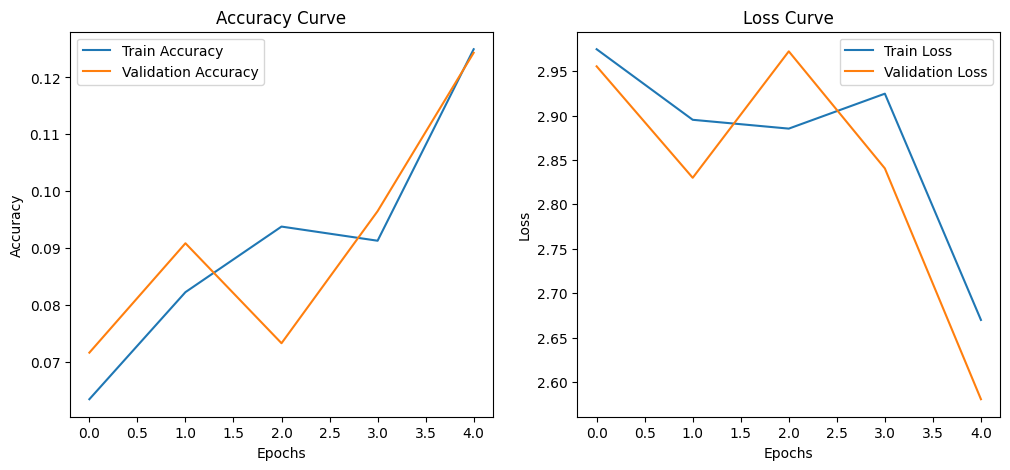

In [24]:
# Step 6: Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Explanation:

We plot the accuracy and loss curves for both training and validation sets.
This helps visualize how well the model is learning over time and whether it is overfitting.
Summary: